<a href="https://colab.research.google.com/github/evangelialampropoulou/Projects/blob/main/Newsit%20scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:Θέλουμε από το newsit να πάρουμε τους τίτλους των 200 τελευταίων άρθρων στην ενότητα Τεχνολογία

Θέλουμε δηλαδή τα άρθρα από τη διεύθυνση "https://www.efsyn.gr/ekloges-2023?page=" και τις σελίδες 0 και 1.

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!python -m spacy download el_core_news_sm

2023-07-02 15:37:07.540881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
pip install selenium

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_newsit():
    base_url = 'https://www.newsit.gr/category/texnologia/page/'
    titles = []
    urls = []
    dates = []
    #summaries = []

    for page_num in range(1, 11):  # iterate over pages 1 to 5
        url = base_url + str(page_num)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = soup.find_all('article')

        for article in articles:
            title = article.find('h2').text
            url = article.find('a')['href']
            #summary = article.find('p').text
            date = article.find('time')['datetime']

            titles.append(title)
            urls.append(url)
            dates.append(date)
            #summaries.append(summary)

    data = {'Title': titles, 'Date': dates, 'URL': urls}
    df = pd.DataFrame(data)

    return df

df = scrape_newsit()
print(df)

                                                 Title  \
0    Αφιερωμένο στις ελληνικές εκλογές το doodle τη...   
1    Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...   
2    Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...   
3    Το LockBit απειλεί και συσκευές macOS – Τι να ...   
4            Η καινοτομία στην καρδιά της MYTILINEOS\n   
..                                                 ...   
196  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...   
197  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...   
198  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...   
199  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...   
200  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....   

                          Date  \
0    2023-06-25T08:54:36+03:00   
1    2023-07-02T17:07:01+03:00   
2    2023-07-02T00:37:24+03:00   
3    2023-06-24T08:31:00+03:00   
4    2023-06-22T14:26:56+03:00   
..                         ...   
196  2022-10-10T03:01:00+03:00   
197  2022-10-07T00:09:32+03:00 

Αποθηκεύουμε το dataframe σαν csv στον drive μας

In [ ]:
df = scrape_newsit()

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the path to save the CSV
path = "/content/gdrive/My Drive/newsit.csv"

# Save the dataframe to a csv file
df.to_csv(path, index=False)

Mounted at /content/gdrive


Διαβάζουμε το csv αρχείο σαν dataframe

In [ ]:
newsit_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1wJ5DzK46sstsDRKmMEtEFLxMyWBdlzVN')
newsit_df.head()

Title  \
0  Αφιερωμένο στις ελληνικές εκλογές το doodle τη...   
1  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...   
2  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...   
3  Το LockBit απειλεί και συσκευές macOS – Τι να ...   
4          Η καινοτομία στην καρδιά της MYTILINEOS\n   

                        Date  \
0  2023-06-25T08:54:36+03:00   
1  2023-07-02T17:07:01+03:00   
2  2023-07-02T00:37:24+03:00   
3  2023-06-24T08:31:00+03:00   
4  2023-06-22T14:26:56+03:00   

                                                 URL  
0  https://www.newsit.gr/texnologia/ekloges-2023-...  
1  https://www.newsit.gr/texnologia/texniti-noimo...  
2  https://www.newsit.gr/texnologia/elon-mask-to-...  
3  https://www.newsit.gr/texnologia/to-LockBit-ap...  
4  https://www.newsit.gr/texnologia/i-kainotomia-...

In [ ]:
newsit_df.shape

(201, 3)

In [ ]:
newsit_df.head()

Title  \
0  Αφιερωμένο στις ελληνικές εκλογές το doodle τη...   
1  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...   
2  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...   
3  Το LockBit απειλεί και συσκευές macOS – Τι να ...   
4          Η καινοτομία στην καρδιά της MYTILINEOS\n   

                        Date  \
0  2023-06-25T08:54:36+03:00   
1  2023-07-02T17:07:01+03:00   
2  2023-07-02T00:37:24+03:00   
3  2023-06-24T08:31:00+03:00   
4  2023-06-22T14:26:56+03:00   

                                                 URL  
0  https://www.newsit.gr/texnologia/ekloges-2023-...  
1  https://www.newsit.gr/texnologia/texniti-noimo...  
2  https://www.newsit.gr/texnologia/elon-mask-to-...  
3  https://www.newsit.gr/texnologia/to-LockBit-ap...  
4  https://www.newsit.gr/texnologia/i-kainotomia-...

Ας μετατρέψουμε το time σε datetime

In [ ]:
newsit_df.dtypes

Title    object
Date     object
URL      object
dtype: object

In [ ]:
newsit_df.loc[0, 'Date']

'2023-06-25T08:54:36+03:00'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from dateutil.parser import parse

In [ ]:
newsit_df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None)

Χωρίζουμε την ημερομηνία από την ώρα

In [ ]:
newsit_df['date'] = newsit_df['Date'].dt.strftime('%Y-%m-%d')
newsit_df['time'] = newsit_df['Date'].dt.strftime('%H:%M:%S')

In [ ]:
newsit_df

Title                Date  \
0    Αφιερωμένο στις ελληνικές εκλογές το doodle τη... 2023-06-25 05:54:36   
1    Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ... 2023-07-02 14:07:01   
2    Το Twitter βάζει προσωρινά όρια ανάγνωσης για ... 2023-07-01 21:37:24   
3    Το LockBit απειλεί και συσκευές macOS – Τι να ... 2023-06-24 05:31:00   
4            Η καινοτομία στην καρδιά της MYTILINEOS\n 2023-06-22 11:26:56   
..                                                 ...                 ...   
196  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT... 2022-10-10 00:01:00   
197  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό... 2022-10-06 21:09:32   
198  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε... 2022-10-06 11:36:22   
199  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC... 2022-10-06 04:33:00   
200  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα.... 2022-10-05 07:17:46   

                                                   URL        date      time  
0    https://www.newsit.gr/texnologia/ekloges-2023-...  2023-06-25  05:54:36  
1    https://www.newsit.gr/texnologia/texniti-noimo...  2023-07-02  14:07:01  
2    https://www.newsit.gr/texnologia/elon-mask-to-...  2023-07-01  21:37:24  
3    https://www.newsit.gr/texnologia/to-LockBit-ap...  2023-06-24  05:31:00  
4    https://www.newsit.gr/texnologia/i-kainotomia-...  2023-06-22  11:26:56  
..                                                 ...         ...       ...  
196  https://www.newsit.gr/texnologia/COSMOTECH-nEW...  2022-10-10  00:01:00  
197  https://www.newsit.gr/texnologia/to-oikosystim...  2022-10-06  21:09:32  
198  https://www.newsit.gr/texnologia/eisai-o-epome...  2022-10-06  11:36:22  
199  https://www.newsit.gr/texnologia/nea-protopori...  2022-10-06  04:33:00  
200  https://www.newsit.gr/texnologia/ergaleio-texn...  2022-10-05  07:17:46  

[201 rows x 5 columns]

Ας φτιάξουμε ένα μικρότερο dataframe...

In [ ]:
short_df = newsit_df[['Title','date','time' ]]

In [ ]:
short_df

Title        date      time
0    Αφιερωμένο στις ελληνικές εκλογές το doodle τη...  2023-06-25  05:54:36
1    Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...  2023-07-02  14:07:01
2    Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...  2023-07-01  21:37:24
3    Το LockBit απειλεί και συσκευές macOS – Τι να ...  2023-06-24  05:31:00
4            Η καινοτομία στην καρδιά της MYTILINEOS\n  2023-06-22  11:26:56
..                                                 ...         ...       ...
196  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...  2022-10-10  00:01:00
197  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...  2022-10-06  21:09:32
198  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...  2022-10-06  11:36:22
199  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...  2022-10-06  04:33:00
200  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....  2022-10-05  07:17:46

[201 rows x 3 columns]

In [ ]:
short_df.tail()

Title        date      time
196  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...  2022-10-10  00:01:00
197  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...  2022-10-06  21:09:32
198  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...  2022-10-06  11:36:22
199  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...  2022-10-06  04:33:00
200  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....  2022-10-05  07:17:46

In [ ]:
short_df.dtypes

Title    object
date     object
time     object
dtype: object

In [ ]:
short_df['date'] = pd.to_datetime(short_df['date'])

<ipython-input-136-e145fe777f26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['date'] = pd.to_datetime(short_df['date'])


In [ ]:
short_df['time'] = pd.to_datetime(short_df['time'])

<ipython-input-137-9a82e7295fb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['time'] = pd.to_datetime(short_df['time'])


In [ ]:
short_df.dtypes

Title            object
date     datetime64[ns]
time     datetime64[ns]
dtype: object

In [ ]:
short_df['year'] = pd.DatetimeIndex(short_df['date']).year
short_df['month'] = pd.DatetimeIndex(short_df['date']).month
short_df['day'] = pd.DatetimeIndex(short_df['date']).day
short_df['hour'] = pd.DatetimeIndex(short_df['time']).hour


<ipython-input-139-21f8c06a5029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['year'] = pd.DatetimeIndex(short_df['date']).year


In [ ]:
short_df.head()

Title       date  \
0  Αφιερωμένο στις ελληνικές εκλογές το doodle τη... 2023-06-25   
1  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ... 2023-07-02   
2  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ... 2023-07-01   
3  Το LockBit απειλεί και συσκευές macOS – Τι να ... 2023-06-24   
4          Η καινοτομία στην καρδιά της MYTILINEOS\n 2023-06-22   

                 time  year  month  day  hour  
0 2023-07-02 05:54:36  2023      6   25     5  
1 2023-07-02 14:07:01  2023      7    2    14  
2 2023-07-02 21:37:24  2023      7    1    21  
3 2023-07-02 05:31:00  2023      6   24     5  
4 2023-07-02 11:26:56  2023      6   22    11

<Axes: >

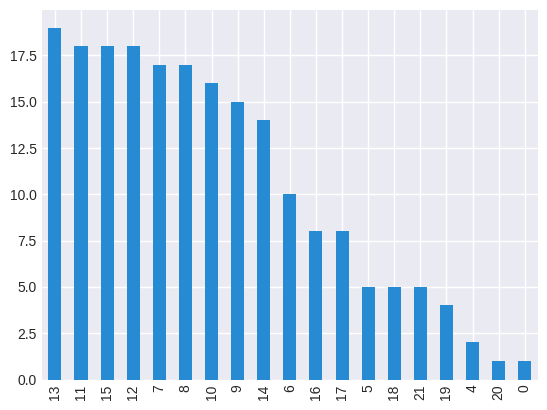

In [ ]:
short_df['hour'].value_counts().plot(kind='bar')

<Axes: >

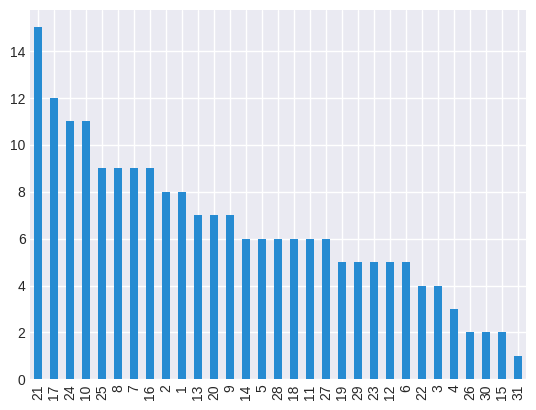

In [ ]:
short_df['day'].value_counts().plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
short_df[short_df['hour']==15]['Title']

9              Τι έψαξαν τα παιδιά στο internet πέρυσι\n
33     Η Google προειδοποιεί τους χρήστες για νέα απά...
42     Αλγόριθμος τεχνητής νοημοσύνης «ξεθολώνει» το ...
45     Xiaomi 13: Τα Public υποδέχονται τη νέα σειρά ...
49     Ρομπότ πιάνει κουβέντα με τους επισκέπτες του ...
72     Προσοχή στα μηνύματα απάτης Phishing – Οδηγίες...
75     Οι νέες εκδόσεις των Bing και Edge διαθέσιμες ...
80     Ποίημα του ChatGPT για τη σοκολάτα κατέληξε ως...
85     «Πράσινα» μεταχειρισμένα iPhone και laptop από...
86     Google: Τέλος η γραπτή αναζήτηση – Ό,τι βλέπει...
99     Το Viber γίνεται υπερ-εφαρμογή με την προσθήκη...
121    «Beyond Robotics», η πρώτη Εθνική Ελλάδας για ...
125             Μνημόνιο συνεργασίας ΔΥΠΑ με τη Huawei\n
128    Κυριάκος Πιερρακάκης στα εγκαίνια του νέου dat...
137    Black Friday 2022: Τι αγόρασαν οι e-καταναλωτέ...
142    Ηλεκτρονικές απάτες: Έτσι θα προστατευτείτε απ...
146    Οι πιο hot Black Friday προσφορές είναι της Hu...
189    5,3 δισεκατομμύρια κινητ

<Axes: >

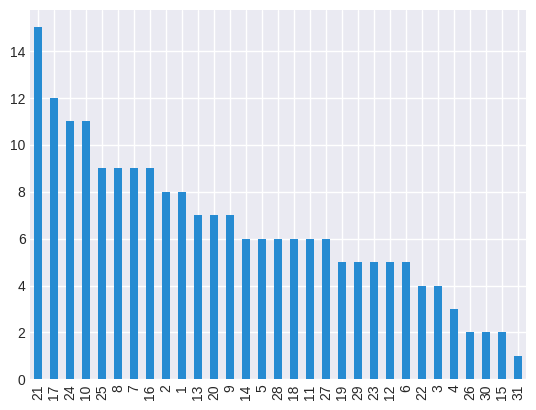

In [ ]:
short_df['day'].value_counts().plot(kind='bar')

In [ ]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
#text = short_df['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


Τα κάνουμε ένα κείμενο

In [ ]:
Title = short_df[short_df['day']==21]['Title'].str.cat(sep = ' ').replace("amp", ' ')


In [ ]:
Title

'Google Maps: Το Immersive View έρχεται και στην Ελλάδα – Οι νέες χρήσιμες λειτουργίες\n Μηνύουν την Amazon για εξαπάτηση εκατομμυρίων καταναλωτών\n Αφιερωμένο στις ελληνικές εκλογές το Doodle της Google\n Μπιλ Γκέιτς, Ρονάλντο, Πάπας, Τραμπ και Μπιγιόνσε έχασαν το «μπλε τικ» στο Twitter - Τέλος η δωρεάν πιστοποίηση λογαριασμών\n OPPO Find N2 Flip: Το νέο αναδιπλούμενο Smartphone σε COSMOTE και ΓΕΡΜΑΝΟ\n Market Pass μέσω Viva Wallet χωρίς λογαριασμό\n Ο Guardian έπεσε θύμα επίθεσης με ransomware - Η ανακοίνωση του βρετανικού μέσου\n Amazon Web Services: Νέες υπηρεσίες για το 2023\n Έλληνες ερευνητές βρήκαν μια νέα «έξυπνη» μέθοδο πρόβλεψης σπάνιων καταστροφικών γεγονότων\n Η nrg κάνει το ταξίδι της ηλεκτροκίνησης πραγματικότητα\n Black Friday 2022: Τα Public υπερδιπλασιάζουν τα προϊόντα, γιατί σου αξίζει!\n Οι πιο hot Black Friday προσφορές είναι της Huawei!\n Black Friday προσφορές σε COSMOTE και ΓΕΡΜΑΝΟ\n Το κινητό μπορεί να προβλέψει αν θα πεθάνουμε μέσα στην επόμενη πενταετία\n Η Ν

In [ ]:
list(STOPWORDS)[0:20]

['all',
 'been',
 'yourself',
 'or',
 'can',
 'into',
 "haven't",
 'http',
 'i',
 'however',
 'more',
 'off',
 'we',
 'so',
 "they've",
 "she'll",
 'k',
 'my',
 'own',
 "isn't"]

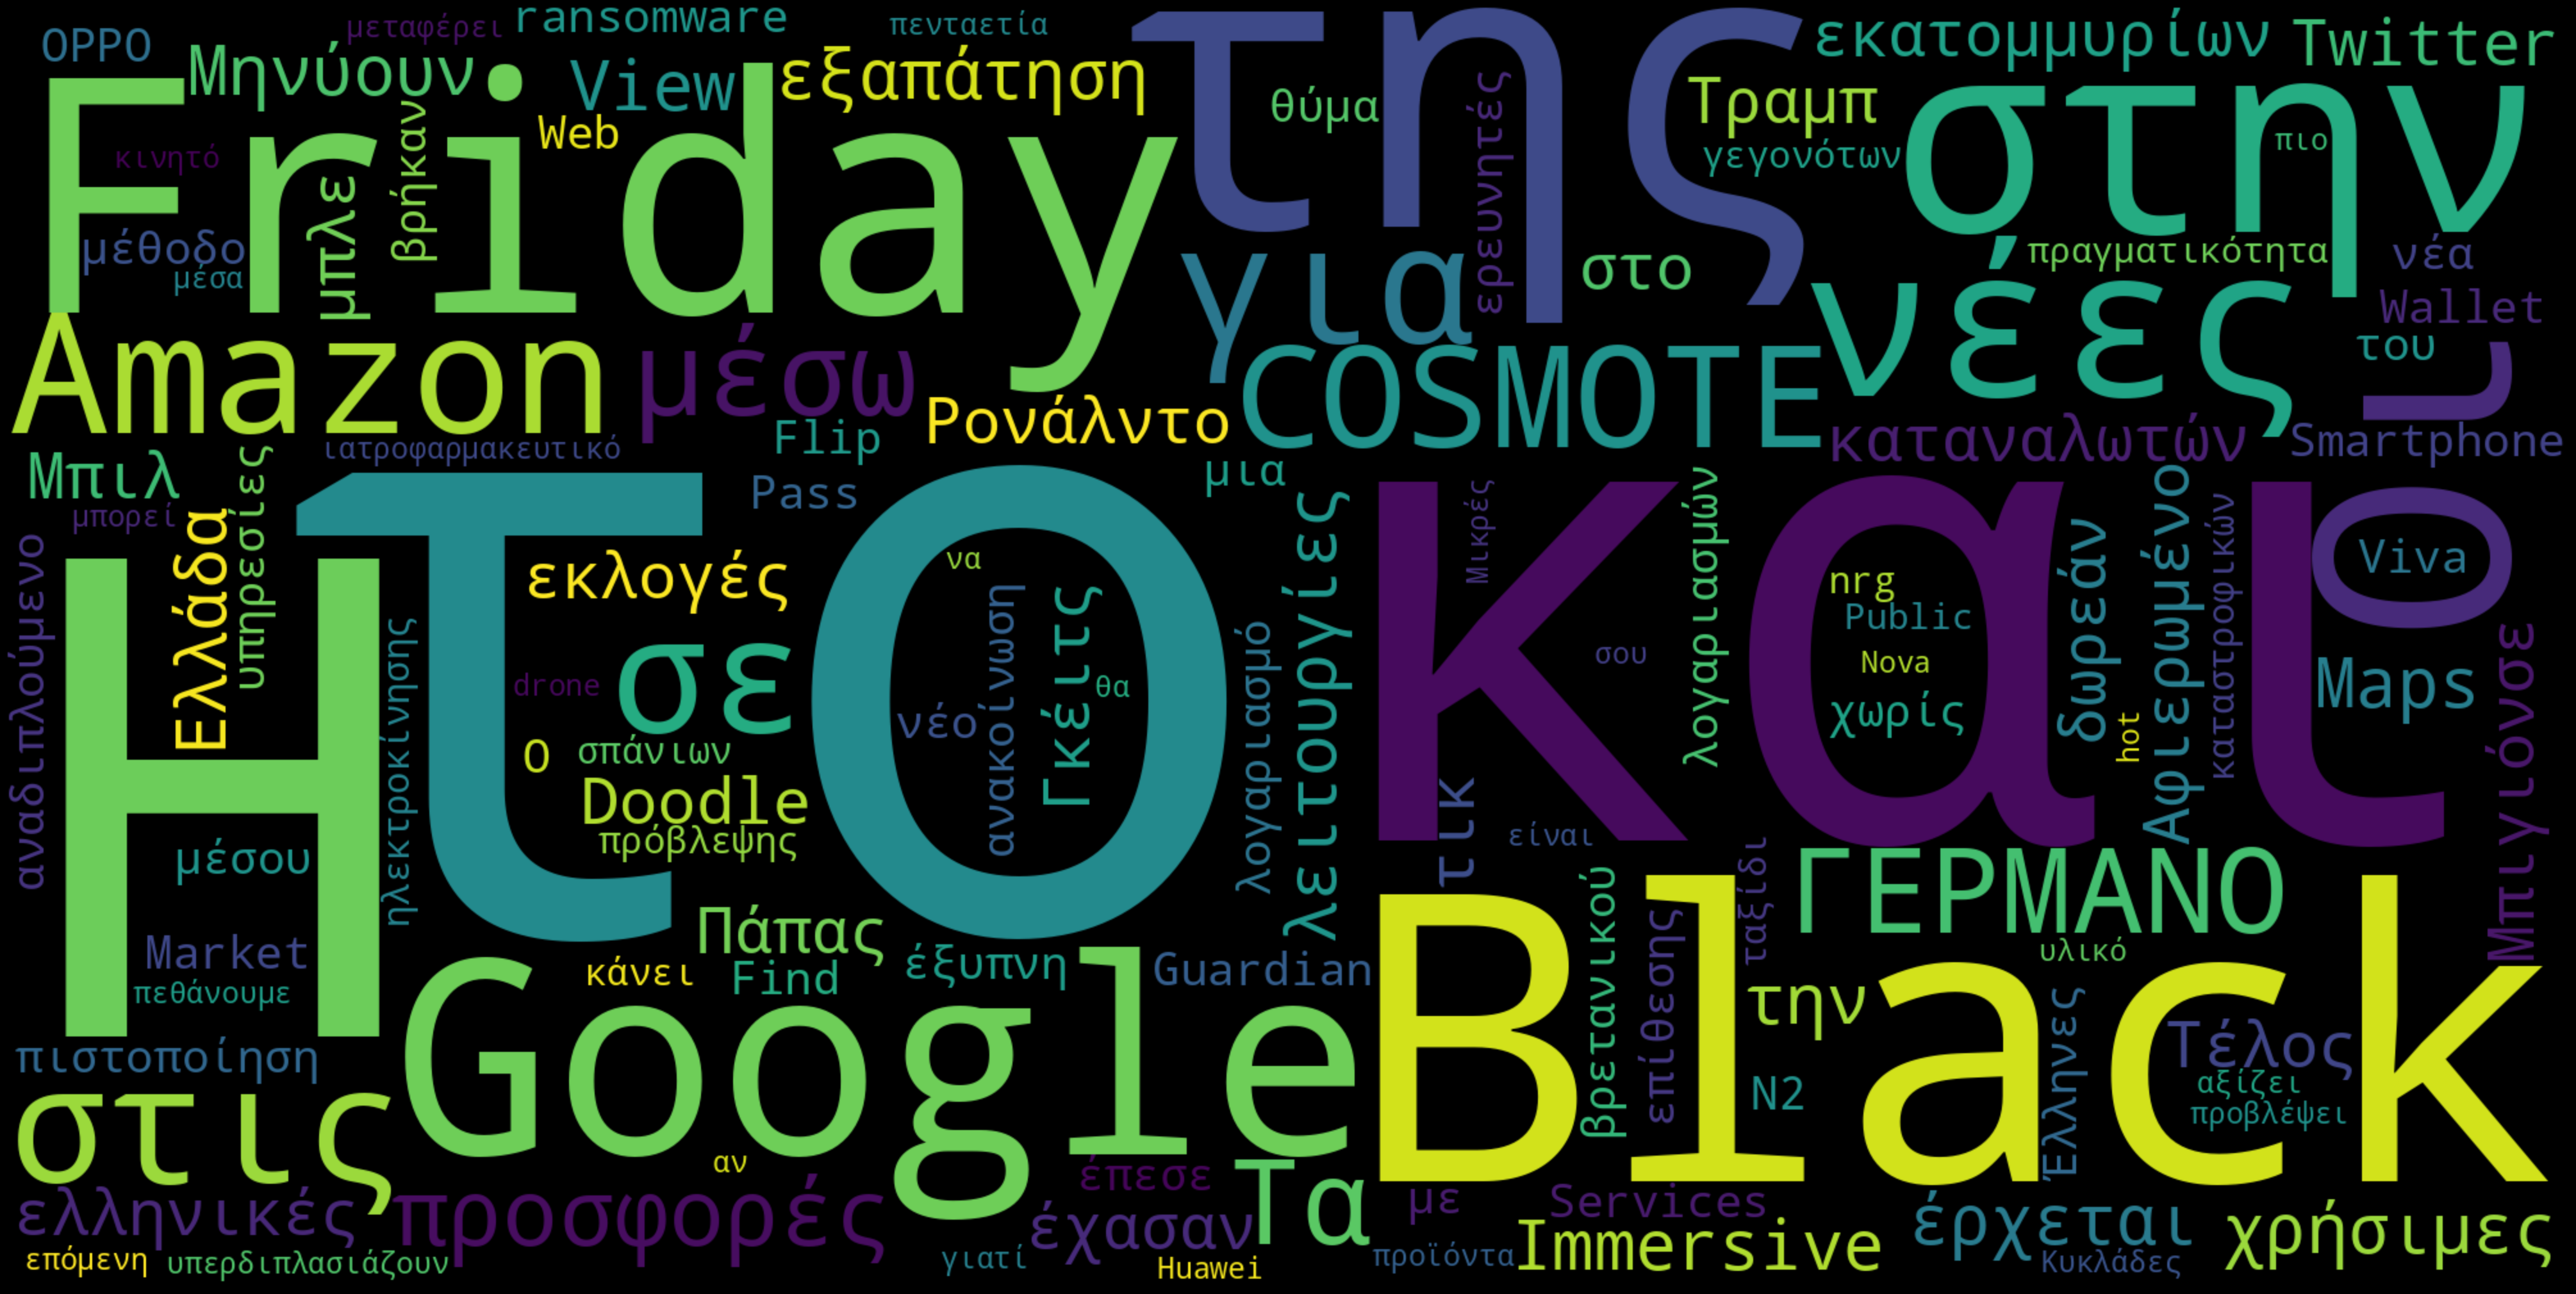

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(Title)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας ψάξουμε τα Ελληνικά stopwords.....

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

2023-07-02 15:38:09.047366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 42.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['πολλές',
 'πιο',
 'κάμποσοι',
 'αυτές',
 'πουθενά',
 'τέτοιων',
 'μόνες',
 'ωχ',
 'ποιόν',
 'εν',
 'πάλι',
 'ετούτες',
 'εκείνης',
 'τέτοιος',
 'όποτε',
 'τούτο',
 'κάποιους',
 'πρώτη',
 'στην',
 'ίδιοσ']

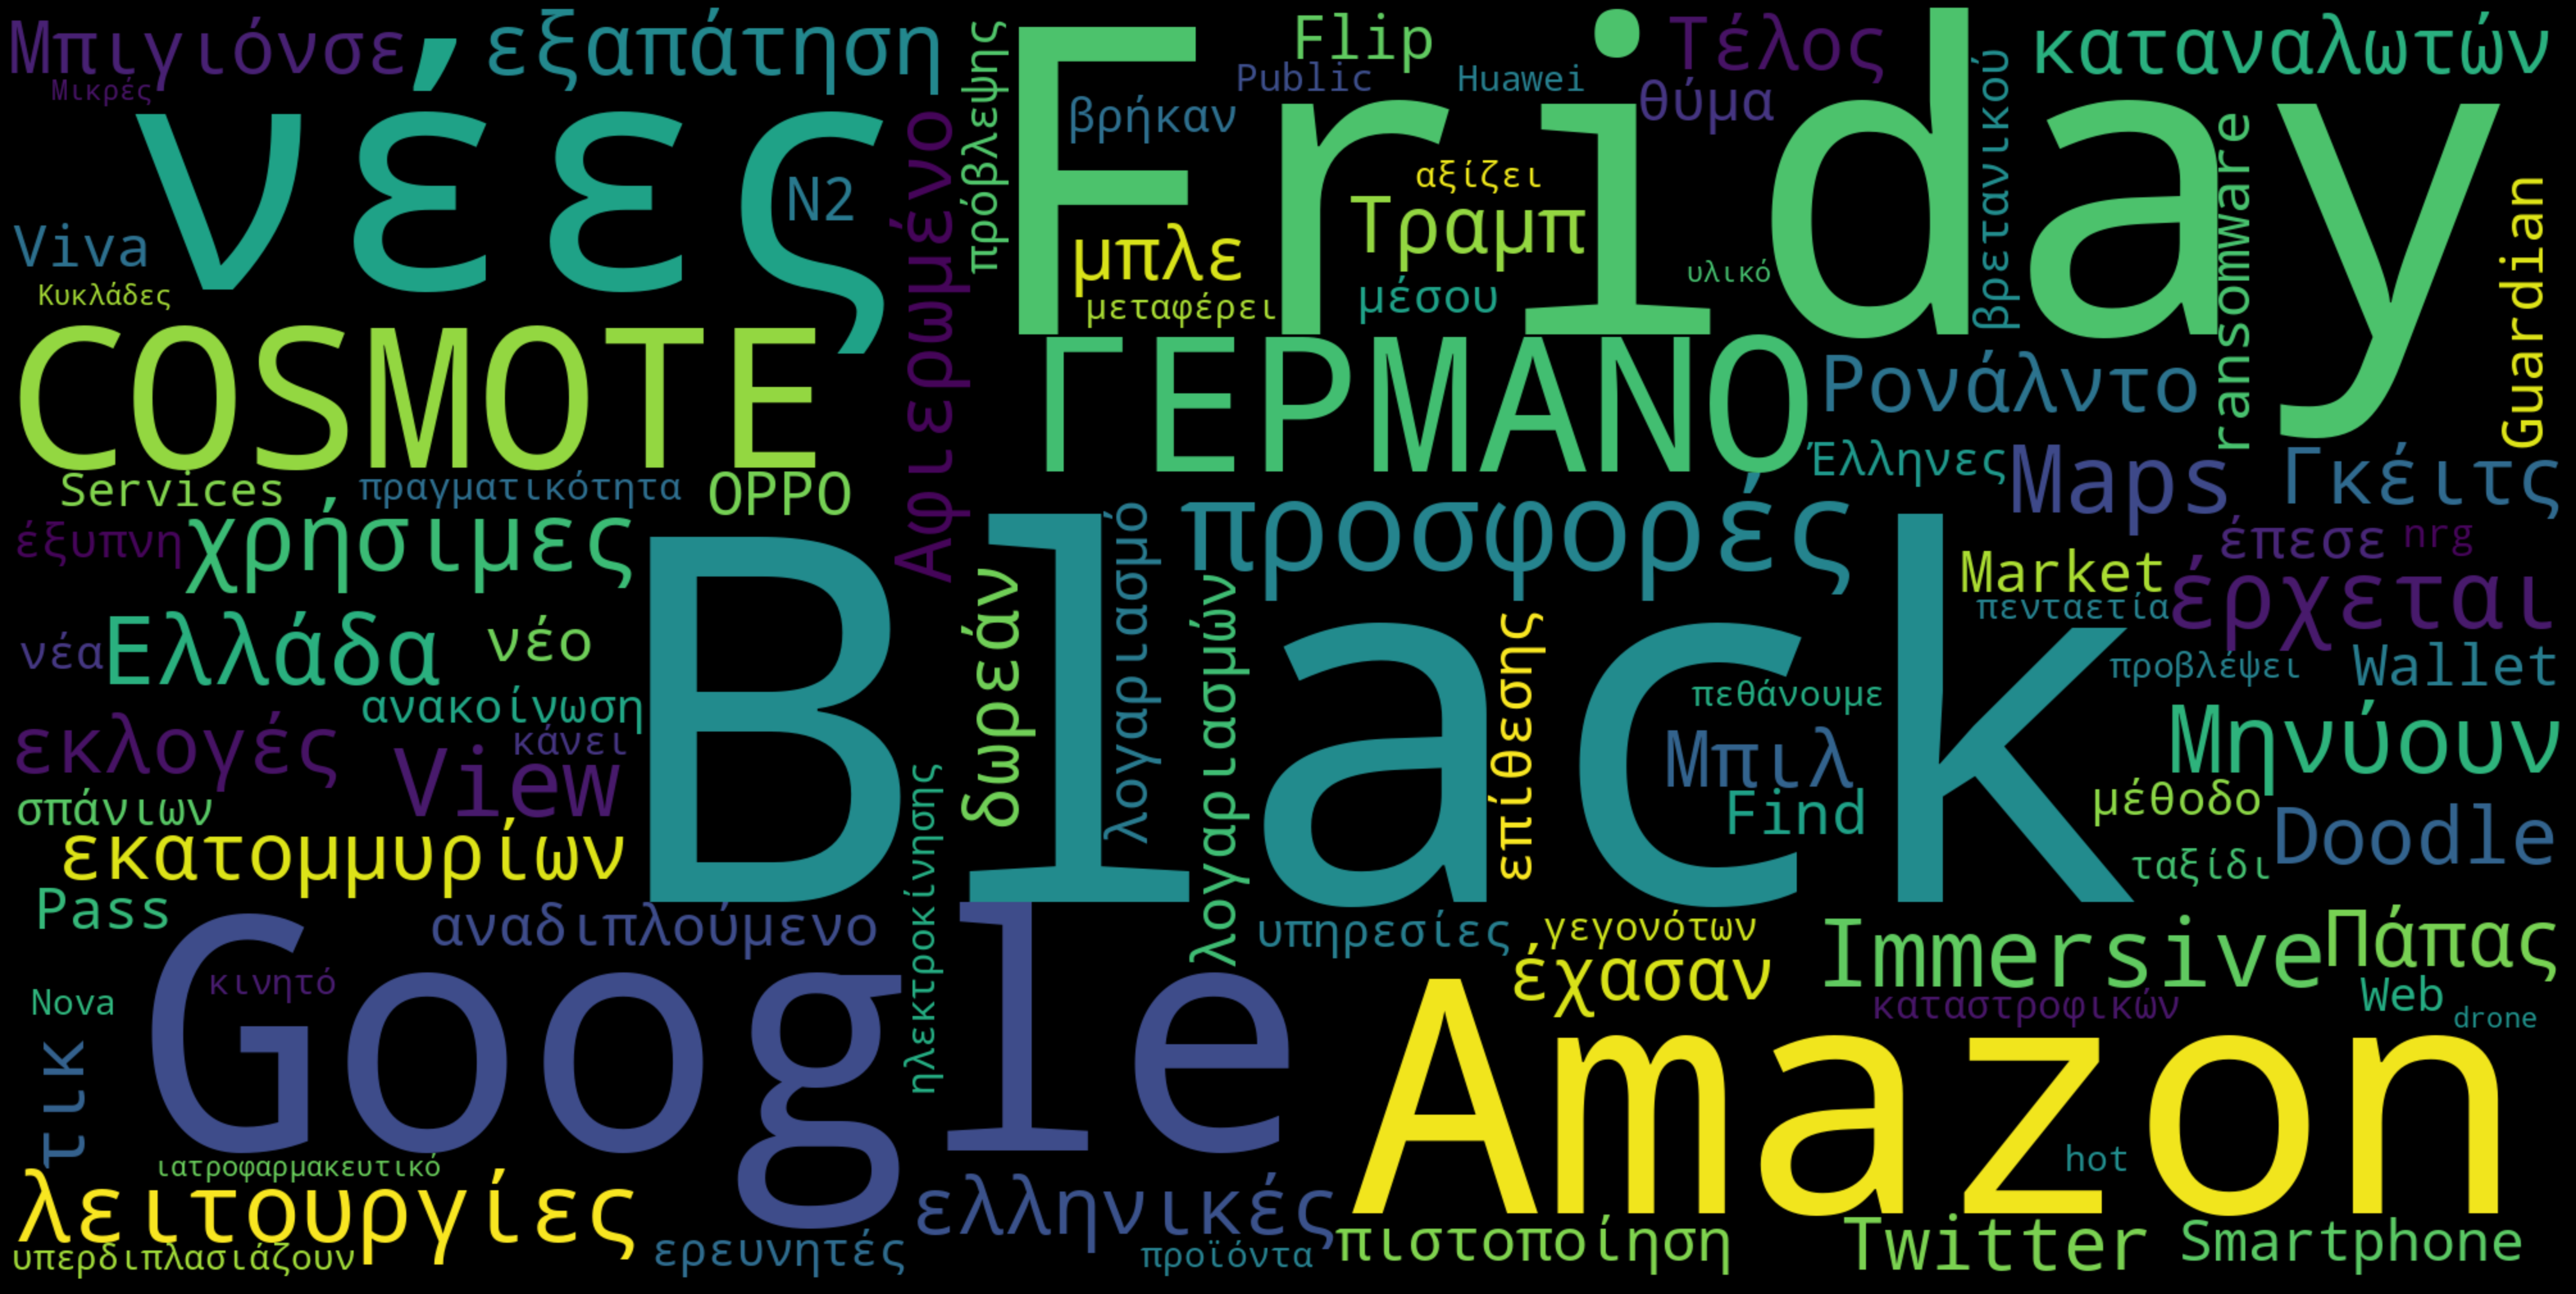

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(Title)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο...

In [ ]:
doc = nlp(short_df['Title'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Ο ο
Πέτρος πέτρος
Κουμουτσάκος Κουμουτσάκος
του ο
Χάρβαρντ Χάρβαρντ
για για
την ο
Τεχνητή Τεχνητή
Νοημοσύνη Νοημοσύνη
- -
« «
Θα θα
αλλάξουν αλλάξω
πολλά πολύς
αλλά αλλά
αυτό αυτός
δεν δεν
είναι είμαι
κακό κακό
» »

 



In [ ]:
' '.join(token.lemma_ for token in doc)

'ο πέτρος Κουμουτσάκος ο Χάρβαρντ για ο Τεχνητή Νοημοσύνη - « θα αλλάξω πολύς αλλά αυτός δεν είμαι κακό » \n'

In [ ]:
Title

'Google Maps: Το Immersive View έρχεται και στην Ελλάδα – Οι νέες χρήσιμες λειτουργίες\n Μηνύουν την Amazon για εξαπάτηση εκατομμυρίων καταναλωτών\n Αφιερωμένο στις ελληνικές εκλογές το Doodle της Google\n Μπιλ Γκέιτς, Ρονάλντο, Πάπας, Τραμπ και Μπιγιόνσε έχασαν το «μπλε τικ» στο Twitter - Τέλος η δωρεάν πιστοποίηση λογαριασμών\n OPPO Find N2 Flip: Το νέο αναδιπλούμενο Smartphone σε COSMOTE και ΓΕΡΜΑΝΟ\n Market Pass μέσω Viva Wallet χωρίς λογαριασμό\n Ο Guardian έπεσε θύμα επίθεσης με ransomware - Η ανακοίνωση του βρετανικού μέσου\n Amazon Web Services: Νέες υπηρεσίες για το 2023\n Έλληνες ερευνητές βρήκαν μια νέα «έξυπνη» μέθοδο πρόβλεψης σπάνιων καταστροφικών γεγονότων\n Η nrg κάνει το ταξίδι της ηλεκτροκίνησης πραγματικότητα\n Black Friday 2022: Τα Public υπερδιπλασιάζουν τα προϊόντα, γιατί σου αξίζει!\n Οι πιο hot Black Friday προσφορές είναι της Huawei!\n Black Friday προσφορές σε COSMOTE και ΓΕΡΜΑΝΟ\n Το κινητό μπορεί να προβλέψει αν θα πεθάνουμε μέσα στην επόμενη πενταετία\n Η Ν

In [ ]:
full_doc = nlp(Title)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'πιλ Γκέιτς , Ρονάλντο , πάπας , Τραμπ και Μπιγιόνσε χάνω ο « μπλε τικ » σε ο Twitter - τέλος ο δωρεάν πιστοποίηση λογαριασμός \n  OPPO Find N2 Flip : ο νέος αναδιπλούμενος Smartphone σε COSMOTE και ΓΕΡ'

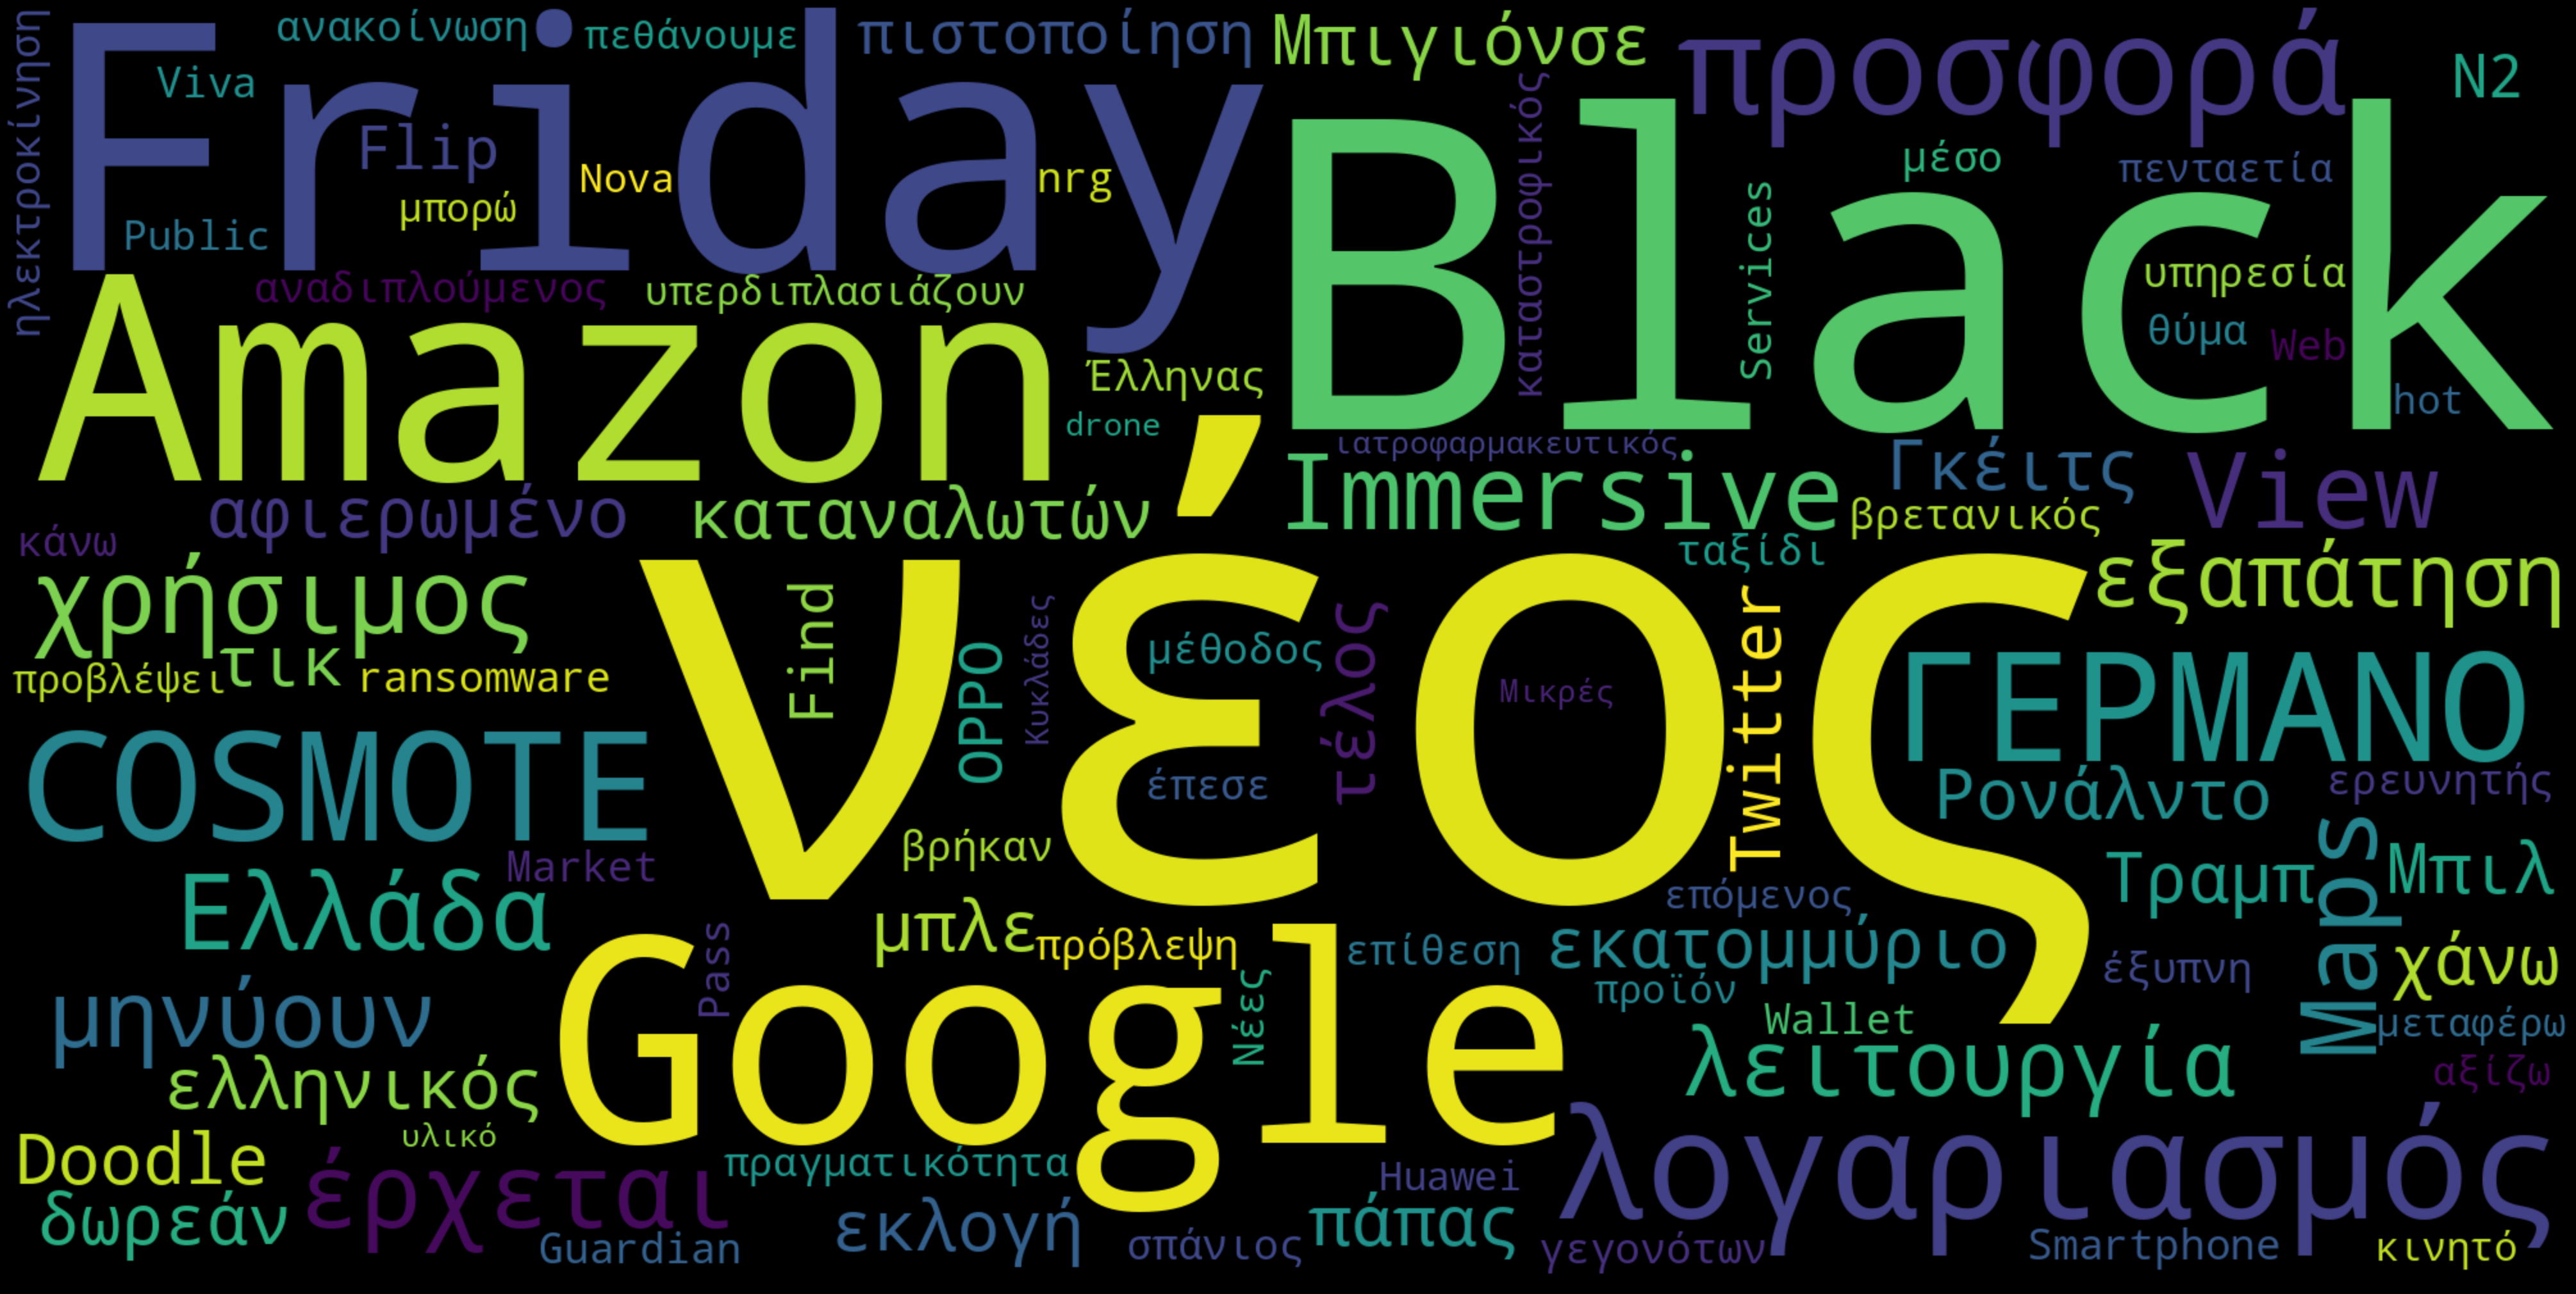

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Kάποια πρώτα συμπεράσματα με βάση τα δύο barcharts που φτιάξαμε: Φαίνεται πως στην εφημερίδα efsyn.gr τα περισσότερα άρθρα δημοσιεύονται νωρίς το μεσημέρι, μεταξύ των ωρών 12:00-16:00. Τα περισσότερα άρθρα στο διάστημα των δύο εβδομάδων που εξετάσαμε δημοσιύτηκαν στις 06/06/23, και ώρα 16:00.
Έπειτα, με βάση τα wordclouds, φαίνεται πως τα άρθρα στην efsyn αναφέρονται κατά κόρον στους πολιτικούς αρχηγούς, και συγκεκριμένα στον πρωθυπουργό Κυριάκο Μητσοτάκη, καθώς και στα κόμματα της αντιπολίτευσης, όπως τον Σύριζα. Γενικά η θεματολογία των άρθρων έχει πολιτικό περιεχόμενο, αναφέρεται στις εκλογές, την προεκλογική περίοδο, και σε έννοιες όπως τηλεμαχία, οικονομία, εκλογή, δήλωση.
Το παραπάνω περιεχόμενο εξηγείται από το γεγονός πως η περίοδος που διανύουμε είναι προεκλογική και είναι λογικό το ενδιαφέρον να στρέφεται προς αυτό τον τομέα.

Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Φτιάχνουμε έναν vectorizer με τις default παραμέτρους, δηλαδή χωρίς να βάλουμε τίποτα μέσα στην παρένθεση)

In [ ]:
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_df['Title'])

In [ ]:
count_vector.shape

(201, 1065)

In [ ]:
count_vector

<201x1065 sparse matrix of type '<class 'numpy.int64'>'
	with 2134 stored elements in Compressed Sparse Row format>

Φτιάχνουμε ένα dataframe με τα αποτελέσματα του vectorizer.

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  10  100  11  13  14  15  150  164  17  ...  ως  όλα  όλη  όλο  όπως  \
0    0   0    0   0   0   0   0    0    0   0  ...   0    0    0    0     0   
1    0   0    0   0   0   0   0    0    0   0  ...   0    0    0    0     0   
2    0   0    0   0   0   0   0    0    0   0  ...   0    0    0    0     0   
3    0   0    0   0   0   0   0    0    0   0  ...   0    0    0    0     0   
4    0   0    0   0   0   0   0    0    0   0  ...   0    0    0    0     0   

   όρια  όσα  όσο  ώρα  ώρες  
0     0    0    0    0     0  
1     0    0    0    0     0  
2     1    0    0    0     0  
3     0    0    0    0     0  
4     0    0    0    0     0  

[5 rows x 1065 columns]

Vectorizer με stop words

In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_df['Title'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  10  100  11  13  14  15  150  164  17  ...  χώρου  ψάχνεις  ψεύτικες  \
0    0   0    0   0   0   0   0    0    0   0  ...      0        0         0   
1    0   0    0   0   0   0   0    0    0   0  ...      0        0         0   
2    0   0    0   0   0   0   0    0    0   0  ...      0        0         0   
3    0   0    0   0   0   0   0    0    0   0  ...      0        0         0   
4    0   0    0   0   0   0   0    0    0   0  ...      0        0         0   

   ψηφιακή  ψηφιακό  ψυχολογία  ψώνισαν  όρια  ώρα  ώρες  
0        0        0          0        0     0    0     0  
1        0        0          0        0     0    0     0  
2        0        0          0        0     1    0     0  
3        0        0          0        0     0    0     0  
4        0        0          0        0     0    0     0  

[5 rows x 966 columns]

Vectorizer με stop words και όρια στις συχνότητες εμφάνισης των λέξεων

In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_df['Title'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

10  11  13  2022  2023  5g  amazon  apple  bestprice  black  ...  \
0   0   0   0     0     0   0       0      0          0      0  ...   
1   0   0   0     0     0   0       0      0          0      0  ...   
2   0   0   0     0     0   0       0      0          0      0  ...   
3   0   0   0     0     0   0       0      0          0      0  ...   
4   0   0   0     0     0   0       0      0          0      0  ...   

   συμβουλές  τέλος  τεχνητή  τεχνητής  τεχνολογίας  υλικό  υπηρεσία  \
0          0      0        0         0            0      0         0   
1          0      0        1         0            0      0         0   
2          0      0        0         0            0      0         0   
3          0      0        0         0            0      0         0   
4          0      0        0         0            0      0         0   

   χρήσιμες  χρήστες  ώρα  
0         0        0    0  
1         0        0    0  
2         0        0    0  
3         0        0    0  
4         0        0    0  

[5 rows x 85 columns]

**Vectorizer με stop words και max_features**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_df['Title'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results1.head()

2022  black  chatgpt  friday  google  huawei  pro  public  smartphones  \
0     0      0        0       0       1       0    0       0            0   
1     0      0        0       0       0       0    0       0            0   
2     0      0        0       0       0       0    0       0            0   
3     0      0        0       0       0       0    0       0            0   
4     0      0        0       0       0       0    0       0            0   

   tiktok  twitter  viber  έλον  ελλάδα  εφαρμογή  μασκ  νέα  νοημοσύνης  \
0       0        0      0     0       0         0     0    0           0   
1       0        0      0     0       0         0     0    0           0   
2       0        1      0     0       0         0     0    0           0   
3       0        0      0     0       0         0     0    0           0   
4       0        0      0     0       0         0     0    0           0   

   ρομπότ  τεχνητής  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

Συχνότερες λέξεις

In [ ]:
results1.sum(axis =0).sort_values(ascending = False)

google         21
νέα            18
2022           12
black          12
twitter        12
friday         11
chatgpt        11
huawei         10
ελλάδα          9
νοημοσύνης      9
τεχνητής        9
public          8
pro             7
tiktok          7
viber           7
έλον            7
εφαρμογή        7
μασκ            7
smartphones     6
ρομπότ          6
dtype: int64

<Axes: >

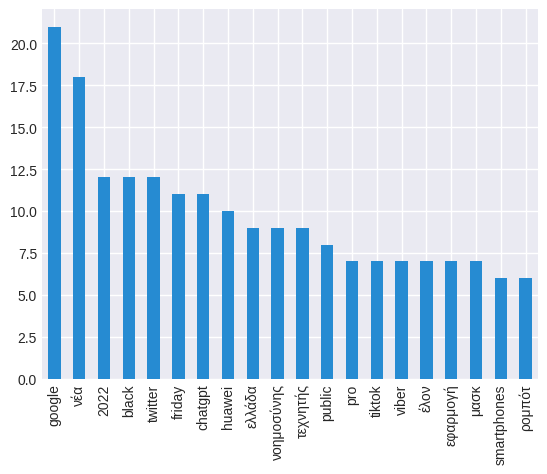

In [ ]:
results1.sum(axis =0).sort_values(ascending = False).plot (kind = 'bar')

Vectorizer με stop words, max features και token pattern

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=200, token_pattern = '\\bψηφιακ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_df['Title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

ψηφιακή  ψηφιακό
0        0        0
1        0        0
2        0        0
3        0        0
4        0        0

Vectorizer με ngrams

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_df['Title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

bestprice gr  black friday  cosmote γερμανο  doodle google  \
0             0             0                0              1   
1             0             0                0              0   
2             0             0                0              0   
3             0             0                0              0   
4             0             0                0              0   

   facebook instagram  fake news  friday 2022  friday προσφορές  google maps  \
0                   0          0            0                 0            0   
1                   0          0            0                 0            0   
2                   0          0            0                 0            0   
3                   0          0            0                 0            0   
4                   0          0            0                 0            0   

   xiaomi 13  έλον μασκ  έρχεται ελλάδα  αφιερωμένο ελληνικές  εκλογές doodle  \
0          0          0               0                     1               1   
1          0          0               0                     0               0   
2          0          0               0                     0               0   
3          0          0               0                     0               0   
4          0          0               0                     0               0   

   ηλεκτρονικές απάτες  καταναλωτές ελλάδα  κινητά τηλέφωνα  \
0                    0                   0                0   
1                    0                   0                0   
2                    0                   0                0   
3                    0                   0                0   
4                    0                   0                0   

   τεχνητή νοημοσύνη  τεχνητής νοημοσύνης  χρήσιμες συμβουλές  
0                  0                    0                   0  
1                  1                    0                   0  
2                  0                    0                   0  
3                  0                    0                   0  
4                  0                    0                   0

Τα συχνότερα διγράμματα (bigrams)

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

black friday            11
τεχνητής νοημοσύνης      9
έλον μασκ                7
τεχνητή νοημοσύνη        6
friday 2022              5
google maps              3
έρχεται ελλάδα           3
xiaomi 13                3
bestprice gr             3
friday προσφορές         3
cosmote γερμανο          3
χρήσιμες συμβουλές       3
fake news                2
facebook instagram       2
αφιερωμένο ελληνικές     2
εκλογές doodle           2
ηλεκτρονικές απάτες      2
καταναλωτές ελλάδα       2
κινητά τηλέφωνα          2
doodle google            2
dtype: int64

<Axes: >

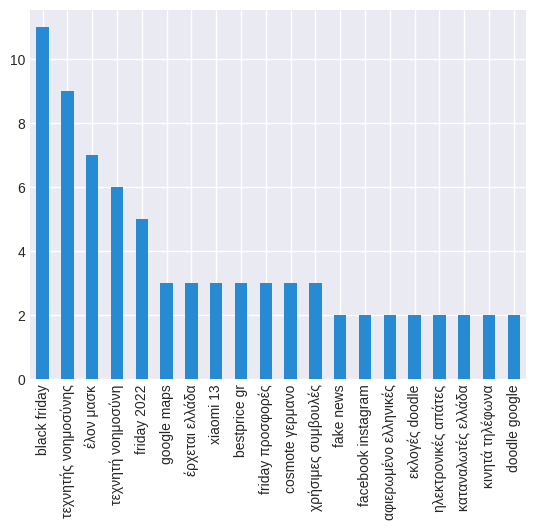

In [ ]:
results.sum(axis =0).sort_values(ascending = False). plot (kind = 'bar')

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

black friday           11
τεχνητής νοημοσύνης     9
έλον μασκ               7
τεχνητή νοημοσύνη       6
friday 2022             5
dtype: int64

Vectorizer με χρήση λεξικού

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['ψηφιακός', 'google', 'νοημοσύνης', 'chatgpt'])
count_vector = cv.fit_transform(short_df['Title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

ψηφιακός  google  νοημοσύνης  chatgpt
0         0       1           0        0
1         0       0           0        0
2         0       0           0        0
3         0       0           0        0
4         0       0           0        0

TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_df['Title'])  #finds the tfidf score with normalization

In [ ]:
results2 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results2.head()

000   10  100   11   13   14   15  150  164   17  ...  χώρες  χώρου  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   ψάχνεις  ψεύτικες  ψηφιακή  ψηφιακό  ψυχολογία  ψώνισαν      όρια  ώρα  
0      0.0       0.0      0.0      0.0        0.0      0.0  0.000000  0.0  
1      0.0       0.0      0.0      0.0        0.0      0.0  0.000000  0.0  
2      0.0       0.0      0.0      0.0        0.0      0.0  0.538818  0.0  
3      0.0       0.0      0.0      0.0        0.0      0.0  0.000000  0.0  
4      0.0       0.0      0.0      0.0        0.0      0.0  0.000000  0.0  

[5 rows x 500 columns]

Cosine similarity (ομοιότητα κειμένων)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         0.         0.         0.08201064
  0.         0.         0.         0.         0.         0.
  0.         0.14743481 0.         0.         1.         0.08783679
  0.         0.06682603 0.         0.15342337 0.         0.
  0.         0.         0.         0.         0.         0.29330693
  0.         0.         0.         0.08090881 0.         0.
  0.         0.         0.         0.         0.07805028 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.32841818
  0.         0.         0.12437046 0.         0.         0.
  0.         0.09657185 0.         0.         0. 

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

Ας δούμε ποια άρθρα μοιάζουν περισσότερο με το 4ο

<Axes: >

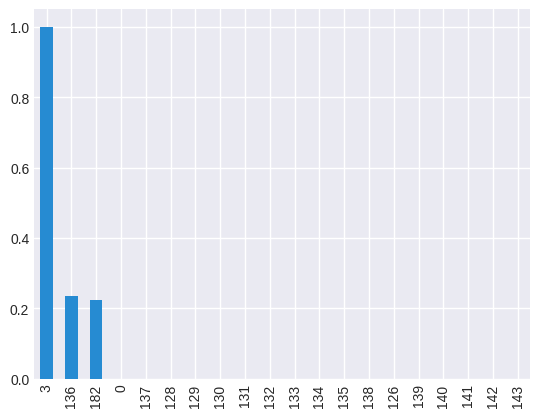

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 4ο άρθρο μοιάζει περισσότερο το 3ο

In [ ]:
short_df['Title'].loc[3]

'Το LockBit απειλεί και συσκευές macOS – Τι να προσέξετε\n'

In [ ]:
short_df['Title'].loc[2]

'Το Twitter βάζει προσωρινά όρια ανάγνωσης για την αντιμετώπιση της εξαγωγής δεδομένων και της χειραγώγησης του συστήματος\n'

Ας δούμε την ομοιότητα των 10 πρώτων άρθρων σε ένα γράφημα (heatmap)

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

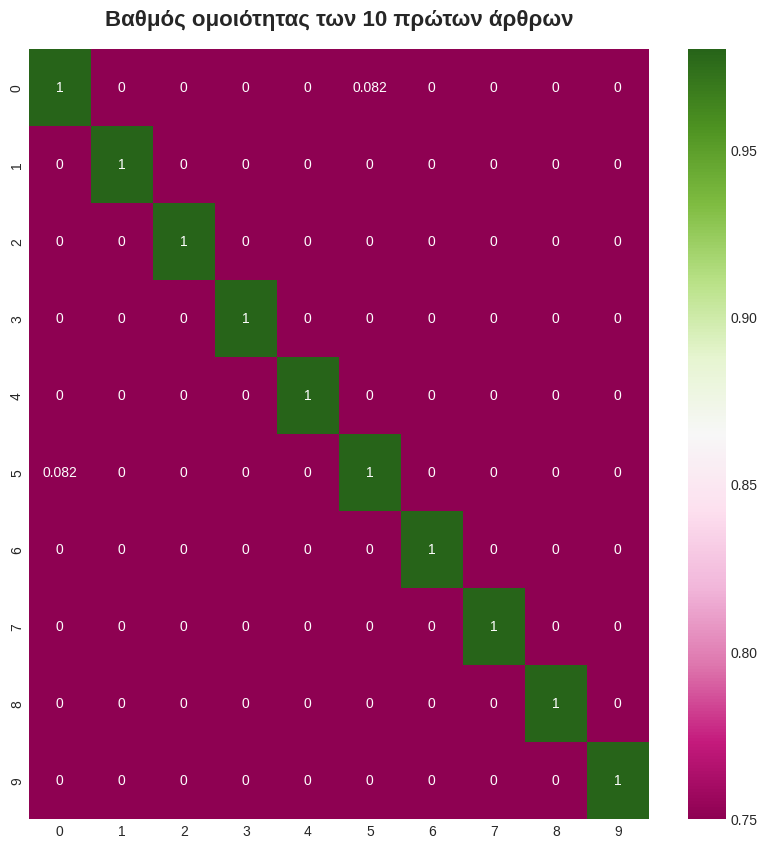

In [ ]:
plt.figure(figsize=(10, 10))
#annot = True #to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

plt.savefig('<fig>.png')

Συναισθηματική ανάλυση

Σύνδεση του gdrive για να φέρουμε τα csvs των κειμένων και να αποθηκεύουμε csvs ή εικόνες που φτιάχνουμε

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Διαβάζουμε το EmoLex (συναισθηματικό λεξικό

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

drop_duplicates() και dropna()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

Φτιάχνουμε ένα df με το date & το Title

In [ ]:
shorter_df = short_df[['date','Title' ]]
#shorter_efsyn_df = short_efsyn_df.rename(columns={'full_text': 'text'} )

In [ ]:
shorter_df

date                                              Title
0   2023-06-25  Αφιερωμένο στις ελληνικές εκλογές το doodle τη...
1   2023-07-02  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...
2   2023-07-01  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...
3   2023-06-24  Το LockBit απειλεί και συσκευές macOS – Τι να ...
4   2023-06-22          Η καινοτομία στην καρδιά της MYTILINEOS\n
..         ...                                                ...
196 2022-10-10  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...
197 2022-10-06  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...
198 2022-10-06  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...
199 2022-10-06  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...
200 2022-10-05  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....

[201 rows x 2 columns]

In [ ]:
shorter_df.dtypes

date     datetime64[ns]
Title            object
dtype: object

In [ ]:
# εαν θέλουμε να πετάξουμε urls που μπορεί να υπάρχουν στο κείμενο
shorter_df['Title'] = shorter_df['Title'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

<ipython-input-204-5c244a0c5ee1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_df['Title'] = shorter_df['Title'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


Φτιάχνουμε έναν vectorizer από τις λέξεις του συναισθηματικού λεξικού

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

Μετράμε πόσες φορές εμφανίζονται οι λέξεις του συναισθηματικού λεξικού στα κείμενα των άρθρων

In [ ]:
matrix = vec.fit_transform(shorter_df['Title'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(201, 13161)

Φτιάχνουμε λίστες με τις λέξεις για θετικότητα/αρνητικότητα και για κάθε συναίσθημα

In [ ]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

Οι λέξεις/φράσεις της κάθε λίστας είναι ονόματα στηλών στο wordcount_df

In [ ]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
200      0                0        0    0     0      0     0             0   

     αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
200     0       0  ...                 0               0      0        0   

     κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
200          0          0             0         0        0     0  

[1 rows x 13161 columns]

Αν εφαρμόσουμε τη λίστα με τις λέξεις/φράσεις ενός συναισθήματος σαν επιλογέα στηλών στο wordcount_df, μπορούμε να "φιλτράρουμε" μόνο αυτές τις συγκεκριμένες στήλες

In [ ]:
wordcount_df[trust_words].tail(1)

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
200     0               0                     0           0         0   

     εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
200             0          0      0              0             0  ...   

     ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
200                0              0               0        0        0       0   

     αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
200            0            0             0                  0  

[1 rows x 1259 columns]

Αν στο τέλος προσθέσουμε την εντολή sum(axis=1) θα πάρουμε το άθροισμα των εμφανίσεων όλων των λέξεων/φράσεων ενός συναισθήματος σε κάθε άρθρο

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    0
198    0
199    1
200    0
Length: 201, dtype: int64

Στο df των άρθρων, δημιουργούμε νέες στήλες (μία για κάθε συναίσθημα) με τιμές το σύνολο των εμφανίσεων λέξεων/φράσεων κάθε συναισθήματος σε κάθε άρθρο

In [ ]:
shorter_df['anger'] = wordcount_df[angry_words].sum(axis=1)

shorter_df['positive'] = wordcount_df[positive_words].sum(axis=1)

shorter_df['joy'] = wordcount_df[joy_words].sum(axis=1)

shorter_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

shorter_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

shorter_df['trust'] = wordcount_df[trust_words].sum(axis=1)

shorter_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

shorter_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

shorter_df['negative'] = wordcount_df[negative_words].sum(axis=1)

shorter_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-216-bb356050de26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-216-bb356050de26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-216-bb356050de26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
shorter_df

date                                              Title  anger  \
0   2023-06-25  Αφιερωμένο στις ελληνικές εκλογές το doodle τη...      0   
1   2023-07-02  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...      1   
2   2023-07-01  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...      0   
3   2023-06-24  Το LockBit απειλεί και συσκευές macOS – Τι να ...      0   
4   2023-06-22          Η καινοτομία στην καρδιά της MYTILINEOS\n      0   
..         ...                                                ...    ...   
196 2022-10-10  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...      0   
197 2022-10-06  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...      0   
198 2022-10-06  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...      0   
199 2022-10-06  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...      0   
200 2022-10-05  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....      0   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0           0    0        0         0      0             0        0         0   
1           0    0        2         0      0             0        1         2   
2           0    0        0         0      0             0        0         0   
3           0    0        0         0      0             0        0         0   
4           1    0        0         0      0             0        0         0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
196         0    0        0         0      0             0        0         0   
197         0    0        0         0      0             0        0         0   
198         0    0        0         0      0             0        0         0   
199         0    0        0         0      1             0        0         0   
200         0    0        0         1      0             0        0         0   

     fear  
0       0  
1       2  
2       0  
3       0  
4       0  
..    ...  
196     0  
197     0  
198     0  
199     1  
200     1  

[201 rows x 12 columns]

Κάνουμε index τη στήλη date

In [ ]:
shorter_df.reset_index(inplace=True)
shorter_df.set_index('date', inplace=True)
shorter_df

index                                              Title  anger  \
date                                                                          
2023-06-25      0  Αφιερωμένο στις ελληνικές εκλογές το doodle τη...      0   
2023-07-02      1  Ο Πέτρος Κουμουτσάκος του Χάρβαρντ για την Τεχ...      1   
2023-07-01      2  Το Twitter βάζει προσωρινά όρια ανάγνωσης για ...      0   
2023-06-24      3  Το LockBit απειλεί και συσκευές macOS – Τι να ...      0   
2023-06-22      4          Η καινοτομία στην καρδιά της MYTILINEOS\n      0   
...           ...                                                ...    ...   
2022-10-10    196  COSMOTECH ΝEWS: Εκπομπή τεχνολογίας της COSMOT...      0   
2022-10-06    197  Το οικοσύστημα Samsung Galaxy διευρύνεται: Ακό...      0   
2022-10-06    198  Είσαι ο επόμενος #plaisiopeople; To Πλαίσιo σε...      0   
2022-10-06    199  Νέα πρωτοποριακή λειτουργία για το HUAWEI WATC...      0   
2022-10-05    200  Εργαλείο τεχνητής νοημοσύνης προβλέπει με ένα....      0   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2023-06-25         0    0        0         0      0             0        0   
2023-07-02         0    0        2         0      0             0        1   
2023-07-01         0    0        0         0      0             0        0   
2023-06-24         0    0        0         0      0             0        0   
2023-06-22         1    0        0         0      0             0        0   
...              ...  ...      ...       ...    ...           ...      ...   
2022-10-10         0    0        0         0      0             0        0   
2022-10-06         0    0        0         0      0             0        0   
2022-10-06         0    0        0         0      0             0        0   
2022-10-06         0    0        0         0      1             0        0   
2022-10-05         0    0        0         1      0             0        0   

            negative  fear  
date                        
2023-06-25         0     0  
2023-07-02         2     2  
2023-07-01         0     0  
2023-06-24         0     0  
2023-06-22         0     0  
...              ...   ...  
2022-10-10         0     0  
2022-10-06         0     0  
2022-10-06         0     0  
2022-10-06         0     1  
2022-10-05         0     1  

[201 rows x 12 columns]

Μετράμε τον μ.ο. του αριθμού των λέξεων ανά ημέρα

<Axes: xlabel='date'>

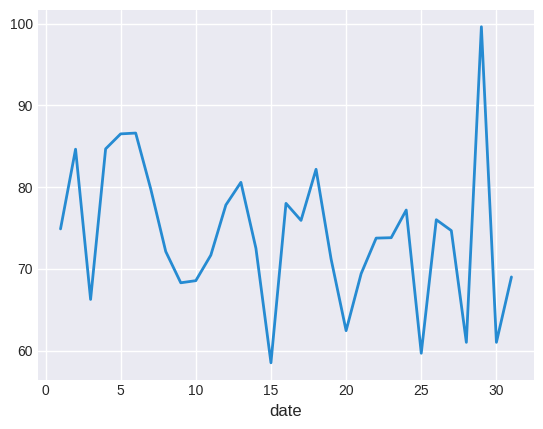

In [ ]:
shorter_df['Title'].str.len().groupby(by=shorter_df.index.day).mean().plot()

Πλήθος άρθρων ανά μήνα

<Axes: ylabel='date'>

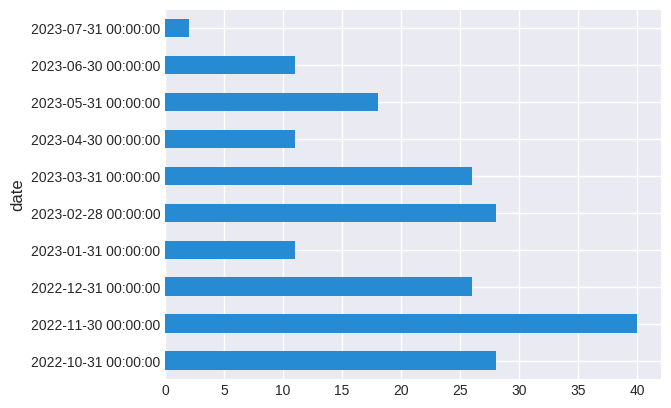

In [ ]:
shorter_df['Title'].resample('M').count().plot(kind='barh')

Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά μήνα

<Axes: xlabel='date'>

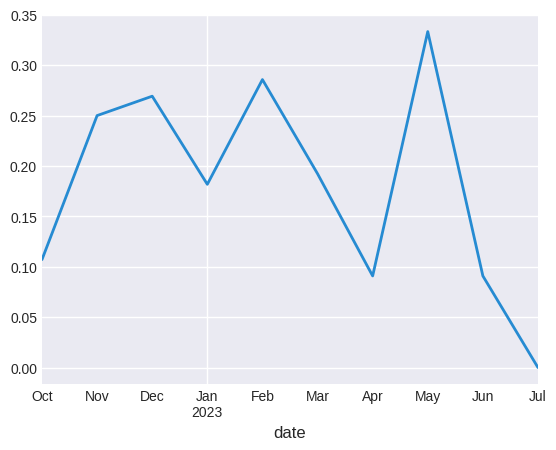

In [ ]:
shorter_df['positive'].resample('M').mean().plot()

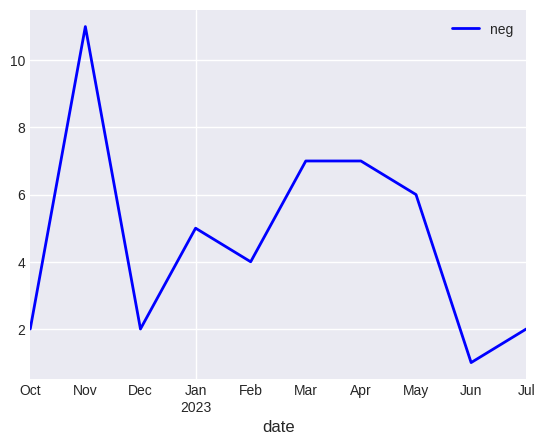

In [ ]:
shorter_df['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

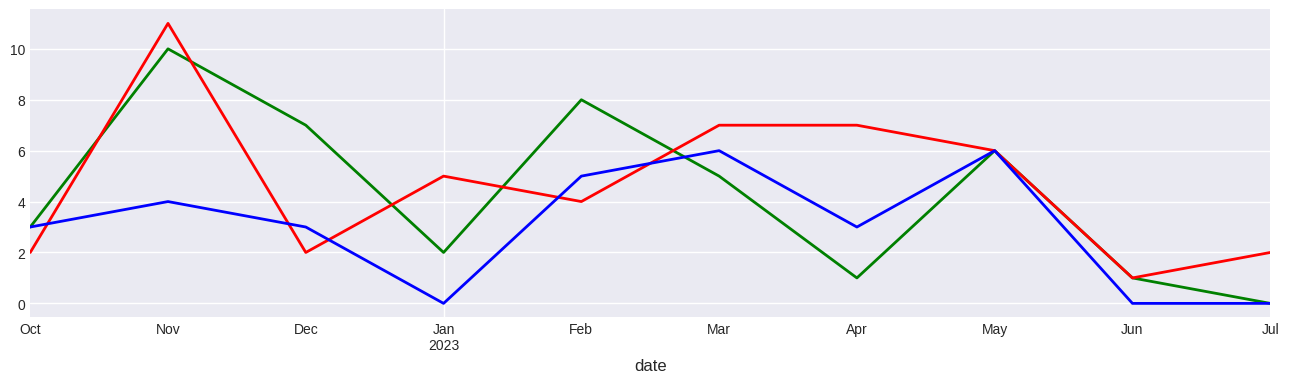

In [ ]:
ax = shorter_df['positive'].resample('M').sum().plot(figsize=(16,4), color = 'green')
shorter_df['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'red')
shorter_df['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('Solarize_Light2')

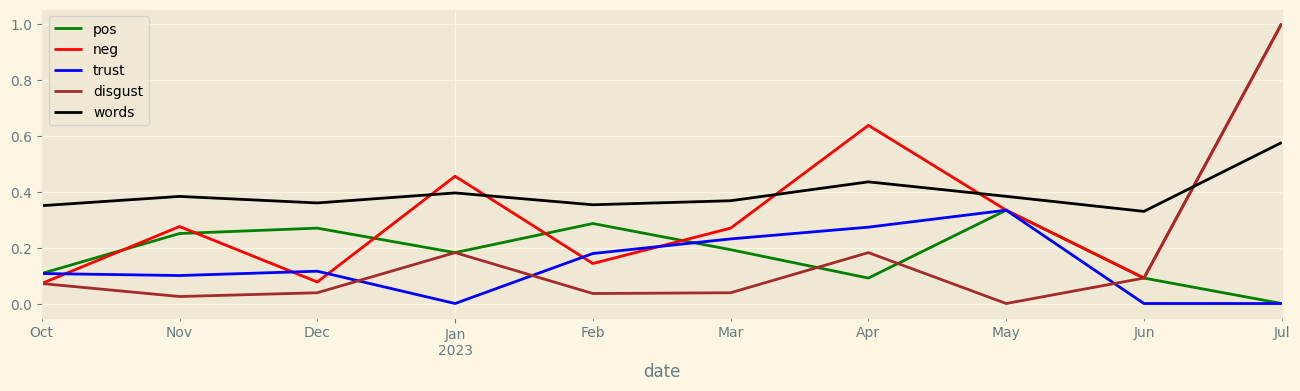

In [ ]:
ax = shorter_df['positive'].resample('M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
shorter_df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
shorter_df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
shorter_df['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(shorter_df['Title'].str.len().resample('M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

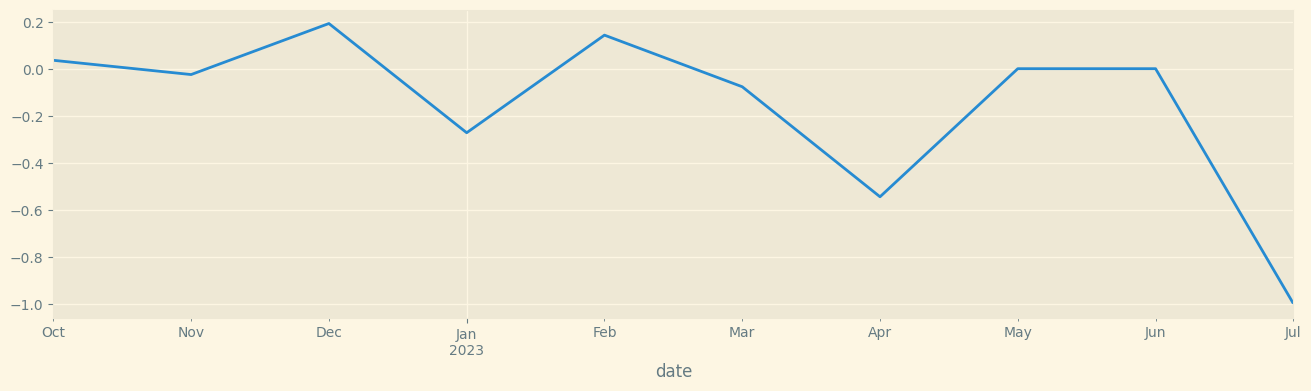

In [ ]:
shorter_df['pos/neg'] = shorter_df['positive'] - shorter_df['negative']
shorter_df['pos/neg'].resample('M').mean().plot(figsize=(16,4))

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

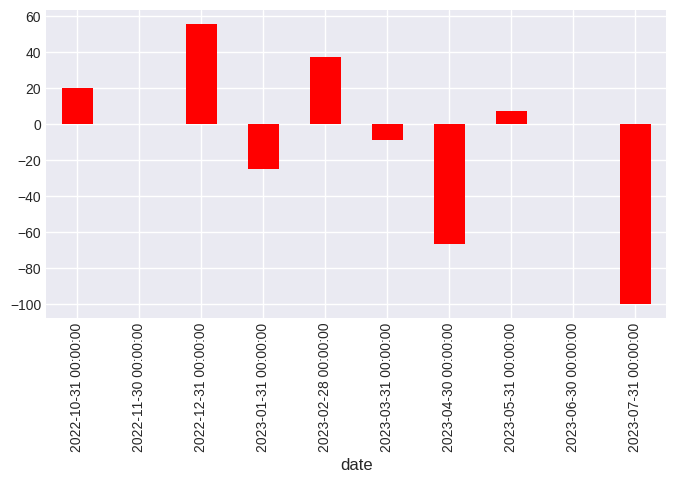

In [ ]:
shorter_df['(-)αρνητικότητα | θετικότητα(+)'] = shorter_df.positive*100//shorter_df[['positive','negative']].sum(
        axis=1) - shorter_df.negative*100//shorter_df[['positive','negative']].sum(axis=1)

shorter_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean().plot(kind='bar',
                                                                               color=(shorter_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

Άρθρο με τη μεγαλύτερη θετικότητα και άρθρο με τη μεγαλύτερη αρνητικότητα

In [ ]:
shorter_df[(shorter_df['(-)αρνητικότητα | θετικότητα(+)'] == shorter_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (shorter_df['(-)αρνητικότητα | θετικότητα(+)'] == shorter_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                                  
2023-07-02      1         0         2                           -100.0
2023-06-22      4         1         0                            100.0
2023-06-21      6         0         1                           -100.0
2023-05-18     17         0         1                           -100.0
2023-05-17     19         0         1                           -100.0
...           ...       ...       ...                              ...
2022-10-27    175         1         0                            100.0
2022-10-21    180         0         1                           -100.0
2022-10-20    183         1         0                            100.0
2022-10-17    187         1         0                            100.0
2022-10-13    190         0         1                           -100.0

[67 rows x 4 columns]